In [3]:
from ultralytics import YOLO
import os

model = YOLO("model_path/YOLOv8_Colab_30_04_2024_v2_Ha/weights/best.pt")

image 1/1 d:\Documents\GitHub\NomOCR\FINAL_test\images\nlvnpf-0059-002.jpg: 1280x832 180 nom_chars, 649.0ms
Speed: 20.0ms preprocess, 649.0ms inference, 4.0ms postprocess per image at shape (1, 3, 1280, 832)
<class 'list'>
Number of detected objects: 180
[tensor(0.8903)]
[tensor(0.8857)]
[tensor(0.8807)]
[tensor(0.8783)]
[tensor(0.8753)]
[tensor(0.8734)]
[tensor(0.8723)]
[tensor(0.8646)]
[tensor(0.8632)]
[tensor(0.8622)]
[tensor(0.8597)]
[tensor(0.8581)]
[tensor(0.8580)]
[tensor(0.8532)]
[tensor(0.8518)]
[tensor(0.8517)]
[tensor(0.8509)]
[tensor(0.8504)]
[tensor(0.8483)]
[tensor(0.8339)]
[tensor(0.8304)]
[tensor(0.8298)]
[tensor(0.8266)]
[tensor(0.8230)]
[tensor(0.8141)]
[tensor(0.8073)]
[tensor(0.8071)]
[tensor(0.8050)]
[tensor(0.8045)]
[tensor(0.7955)]
[tensor(0.7952)]
[tensor(0.7883)]
[tensor(0.7855)]
[tensor(0.7830)]
[tensor(0.7800)]
[tensor(0.7796)]
[tensor(0.7748)]
[tensor(0.7735)]
[tensor(0.7711)]
[tensor(0.7699)]
[tensor(0.7696)]
[tensor(0.7672)]
[tensor(0.7669)]
[tensor(0.7662

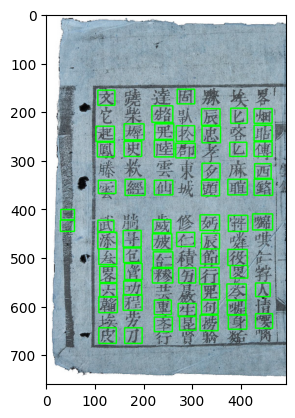

In [5]:
import cv2
import matplotlib.pyplot as plt
# img = cv2.imread("wb_localization_dataset/images/test/DVSKTT_ngoai_I_1a.jpg")
img = cv2.imread("FINAL_test/images/nlvnpf-0059-002.jpg")
def rotate_image(image, angle):
    height = image.shape[0]
    width = image.shape[1]
    center = (width/2, height/2)
    size = (width, height)
    rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
    res = cv2.warpAffine(image, rot_mat, size)
    return res
    
# img_gray_rotated = rotate_image(img, 45)

results = model.predict("FINAL_test/images/nlvnpf-0059-002.jpg")
print(type(results))
for result in results:
    # result.save_txt("FINAL_test/labels/__scale__nlvnpf-0137-01-001.txt")
    boxes = result.boxes  # Bounding box predictions
    conf_scores = boxes.conf
    print(f"Number of detected objects: {len(boxes)}")
    for i in range(len(boxes)):
        print([conf_scores[i]])
        if(conf_scores[i] > 0.7):
            x1, y1, x2, y2 = boxes[i].xyxy[0].cpu().numpy().astype(int)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding box

    # Display the image with bounding boxes
    plt.imshow(img)

In [9]:
image_directory = 'FINAL_test/images'
output_directory = 'FINAL_test/labels'

os.makedirs(output_directory, exist_ok=True)

def grading(image_directory, output_directory):
    for filename in os.listdir(image_directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            results = model.predict(os.path.join(image_directory, filename), save=True, stream=True)
            for result in results:
                txt_filename = os.path.join(output_directory, os.path.splitext(filename)[0] + '.txt')
                result.save_txt(txt_filename)

In [10]:
grading(image_directory, output_directory)


image 1/1 d:\Documents\GitHub\NomOCR\FINAL_test\images\__scale__nlvnpf-0137-01-001.jpg: 800x1280 159 nom_chars, 895.9ms
Speed: 36.1ms preprocess, 895.9ms inference, 8.0ms postprocess per image at shape (1, 3, 800, 1280)
Results saved to runs\detect\predict

image 1/1 d:\Documents\GitHub\NomOCR\FINAL_test\images\__scale__nlvnpf-0137-01-002.jpg: 1184x1280 300 nom_chars, 1494.0ms
Speed: 44.7ms preprocess, 1494.0ms inference, 15.0ms postprocess per image at shape (1, 3, 1184, 1280)
Results saved to runs\detect\predict

image 1/1 d:\Documents\GitHub\NomOCR\FINAL_test\images\__scale__nlvnpf-0137-01-003.jpg: 736x1280 124 nom_chars, 736.0ms
Speed: 30.0ms preprocess, 736.0ms inference, 4.0ms postprocess per image at shape (1, 3, 736, 1280)
Results saved to runs\detect\predict

image 1/1 d:\Documents\GitHub\NomOCR\FINAL_test\images\__scale__nlvnpf-0137-01-004.jpg: 1280x1216 86 nom_chars, 1518.0ms
Speed: 67.4ms preprocess, 1518.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 121

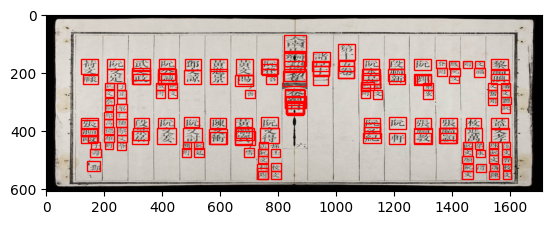

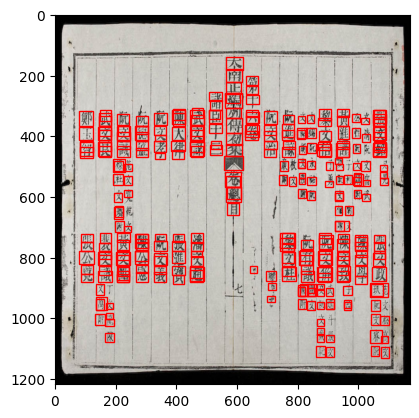

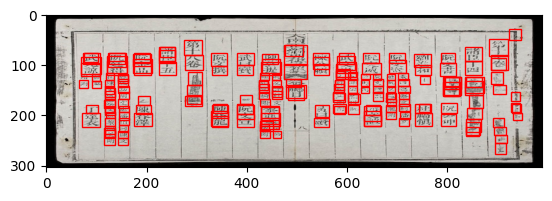

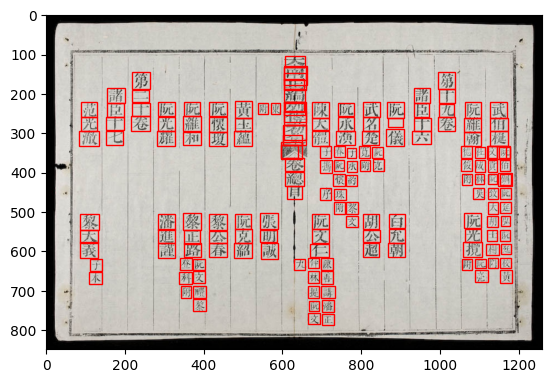

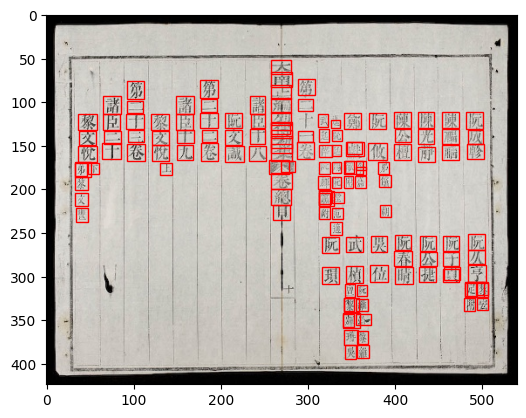

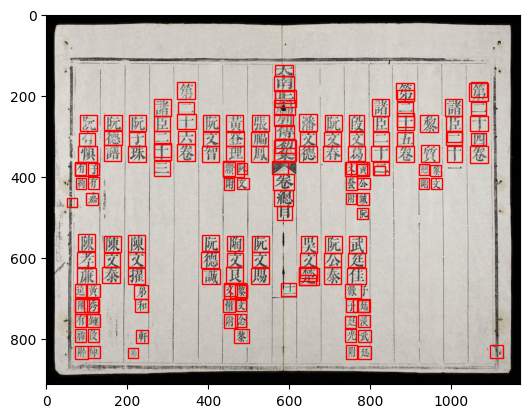

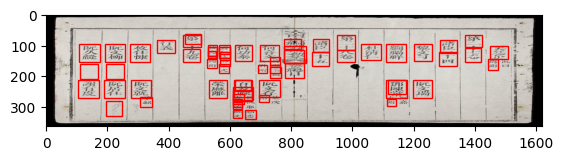

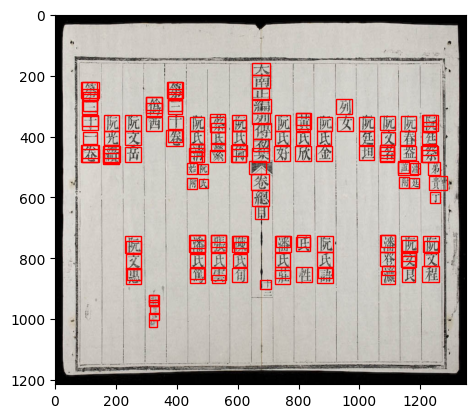

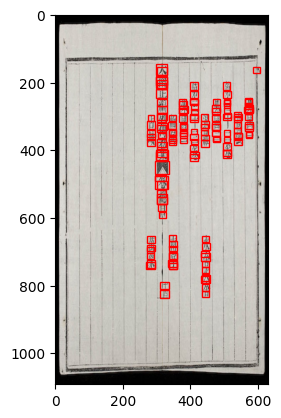

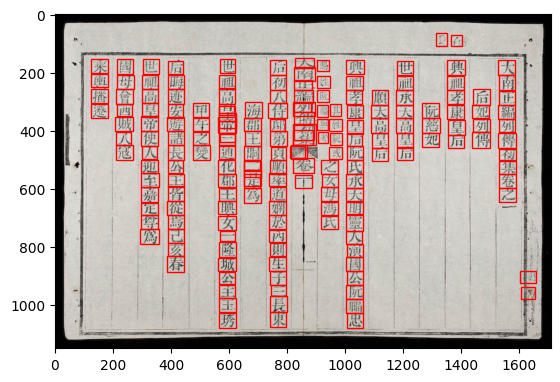

In [8]:
from utils import plot_BB_center
for filename in os.listdir(image_directory):
    img_pth = os.path.join(image_directory, filename)
    coord_path = os.path.join(output_directory, os.path.splitext(filename)[0] + '.txt')
    plot_BB_center(img_pth, coord_path)